# Exploración Inicial de los datos

El objetivo de este notebook es explorar la estructura de los datos previo a cargarlos en un sistema de almacenamiento local.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargando el csv en un dataframe, los metadatos fueron consultados en el xlsx
dataframe = pd.read_csv('datos_base_clientes.csv')

In [3]:
dataframe.head()

,documento,tipo_doc,categoria,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
0,-9222147298886477023,1,COMIDA,0.05,7,1.000000,1.000
1,-9221406660220722252,1,COMIDA,0.25,2,0.050916,0.125
2,-9221406660220722252,1,OTROS,3.24,4,0.659878,0.250
3,-9221406660220722252,1,TRANSPORTE,0.34,4,0.069246,0.250
4,-9221406660220722252,1,HOGAR,1.08,6,0.219959,0.375


## Verificando tamaño, campos nulos, valores anormales

In [4]:
dataframe.describe()

,documento,tipo_doc,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
count,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,1.344256e+16,1.170667,24.967153,12.742507,0.266855,0.272582
std,5.318371e+18,0.376219,612.668753,24.462331,0.318097,0.301731
min,-9.222147e+18,1.000000,0.000000,1.000000,0.000000,0.000665
25%,-4.598571e+18,1.000000,0.150000,2.000000,0.030929,0.048193
50%,3.726371e+15,1.000000,0.510000,4.000000,0.119709,0.142857
75%,4.631182e+18,1.000000,1.744728,13.000000,0.392045,0.400000
max,9.223185e+18,2.000000,72623.371734,806.000000,1.000000,1.000000


Hay $150,000$ filas para todos los campos por lo que no hay fila con campos vacíos, en la siguientes celdas se confirma.

In [5]:
# Buscando valores nulos
dataframe.isnull().sum()

documento          0
tipo_doc           0
categoria          0
mnt_trx_mm         0
num_trx            0
pct_mnt_tot        0
pct_num_trx_tot    0
dtype: int64

## Explorando cada campo

In [6]:
# verificando la cantidad de hashes
dataframe['documento'].unique().shape

(40879,)

In [7]:
# Verificando que 'tipo_doc' solo tenga valores 1 y 2 como se describe en metadatos_clientes.xlsx
dataframe['tipo_doc'].unique()

array([1, 2])

In [8]:
# verificando si hay un mismo hash de 'documento' con diferente tipo_doc
tipo_doc_per_document = dataframe[['documento', 'tipo_doc']].groupby('documento')
tipo_doc_per_document = tipo_doc_per_document.agg({'tipo_doc': "nunique"})
tipo_doc_per_document.reset_index()

non_unique_doc = tipo_doc_per_document[tipo_doc_per_document['tipo_doc'] > 1]
non_unique_doc

,tipo_doc
documento,
-8886733387495043405,2
-8328642375011746248,2
-4283122804906589736,2
2357282740456842526,2
2690507909739377822,2
3816563126010900315,2
4917008452211258215,2
7027883306077194237,2
8643609089628804448,2


Los hashes anteriores son iguales pero tienen diferente `tipo_doc` eso significa que son diferentes clientes.

In [10]:
# explorando algunos casos particulares 
dataframe[dataframe['documento'] == non_unique_doc.iloc[0].name]

,documento,tipo_doc,categoria,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
2649,-8886733387495043405,1,VIAJES,0.300000,1,0.085960,0.050000
2650,-8886733387495043405,1,OTROS,1.530000,4,0.438395,0.200000
2651,-8886733387495043405,1,SALUD Y CUIDADO PERSONAL,0.020000,1,0.005731,0.050000
2652,-8886733387495043405,1,EDUCACIÓN,0.960000,1,0.275072,0.050000
2653,-8886733387495043405,1,HOGAR,0.100000,8,0.028653,0.400000
2654,-8886733387495043405,1,COMIDA,0.050000,1,0.014327,0.050000
2655,-8886733387495043405,1,TRANSPORTE,0.250000,2,0.071633,0.100000
2656,-8886733387495043405,1,ENTRETENIMIENTO,0.280000,2,0.080229,0.100000
2657,-8886733387495043405,2,EDUCACIÓN,0.960000,1,0.200138,0.023256
2658,-8886733387495043405,2,SALUD Y CUIDADO PERSONAL,0.026600,1,0.005545,0.023256


Esto significa que hay varios `documento` con diferente `tipo_doc` i.e. `(documento, tipo_doc)` puede ser una llave primaria.

In [11]:
# Categorias
dataframe['categoria'].describe()

count     150000
unique        12
top        HOGAR
freq       26167
Name: categoria, dtype: object

In [12]:
# Listar las diferentes categorías
dataframe['categoria'].unique()

array(['COMIDA', 'OTROS', 'TRANSPORTE', 'HOGAR', 'RETIROS EN EFECTIVO',
       'TECNOLOGÍA Y COMUNICACIONES', 'SALUD Y CUIDADO PERSONAL',
       'ENTRETENIMIENTO', 'VIAJES', 'MODA', 'EDUCACIÓN', 'MASCOTAS'],
      dtype=object)

In [13]:
# Monto (en millones) de gasto del cliente
dataframe['mnt_trx_mm'].describe()

count    150000.000000
mean         24.967153
std         612.668753
min           0.000000
25%           0.150000
50%           0.510000
75%           1.744728
max       72623.371734
Name: mnt_trx_mm, dtype: float64

In [14]:
# Total de transacciones en cada categoría
tot_trans_per_cat = dataframe[['categoria', 'num_trx']].groupby('categoria', as_index=False).sum()
tot_trans_per_cat.columns = ['categoria', 'total transacciones']
tot_trans_per_cat

,categoria,total transacciones
0,COMIDA,366048
1,EDUCACIÓN,4826
2,ENTRETENIMIENTO,68228
3,HOGAR,291509
4,MASCOTAS,9124
5,MODA,123266
6,OTROS,567133
7,RETIROS EN EFECTIVO,100120
8,SALUD Y CUIDADO PERSONAL,113024
9,TECNOLOGÍA Y COMUNICACIONES,36024


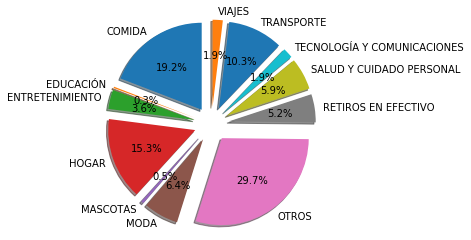

In [15]:
# Comparar los porcentajes de transacciones
labels = tot_trans_per_cat['categoria'].values
sizes = tot_trans_per_cat['total transacciones']
explode = [0.2]*len(labels)

plt.pie(sizes, labels=labels, explode = explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [16]:
# Porcentaje del monto sobre el resto de categorías del cliente para el cliente
# Como es porcentaje verificar que está en [0,1]
min_val = dataframe['pct_mnt_tot'].min()
max_val = dataframe['pct_mnt_tot'].max()

print(f"Valor mínimo: {min_val}, Valor máximo: {max_val}")

Valor mínimo: 0.0, Valor máximo: 1.0


In [17]:
# Agrupando por cliente = (documento, tipo_doc) para comprender mejor este campo
pivot_table = dataframe.pivot_table(index=['documento', 'tipo_doc'], columns='categoria', values='pct_mnt_tot')
pivot_table

,categoria,COMIDA,EDUCACIÓN,ENTRETENIMIENTO,HOGAR,MASCOTAS,MODA,OTROS,RETIROS EN EFECTIVO,SALUD Y CUIDADO PERSONAL,TECNOLOGÍA Y COMUNICACIONES,TRANSPORTE,VIAJES
documento,tipo_doc,,,,,,,,,,,,
-9222147298886477023,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9221406660220722252,1,0.050916,NaN,NaN,0.219959,NaN,NaN,0.659878,NaN,NaN,NaN,0.069246,NaN
-9220114811221045968,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
-9220026565340510548,2,0.291867,NaN,0.088153,0.294288,NaN,0.056070,0.044714,NaN,0.025818,0.009891,0.160356,0.028842
-9219960982130996550,1,NaN,NaN,NaN,0.573980,NaN,0.262755,NaN,NaN,0.163265,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221728632312518098,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9222271169940317935,2,0.272524,NaN,0.005386,NaN,NaN,0.025877,0.057302,0.019585,0.079711,NaN,0.017634,0.521982
9222328716020693079,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


En base a la tabla anterior este campo está construido de la siguiente forma:
$$\text{pct_mnt_tot}_i = \dfrac{monto}{\text{gato en categoria } c_i}$$

donde $c_i$ varia sobre cada categoría.

De acuerdo a la naturaleza de este campo la suma (para cada cliente) de este campo sobre todas las categorías debería ser $1$, i.e.

$$\sum_{i \, \in \,  \text{enum(categorías)} } \text{pct_mnt_tot}_i = 1 $$

notar que el `NaN` en algunas celdas es porque el cliente no gasto en ese categoría

In [18]:
# agregando una columna que representa la suma de todas porcentajes para cada cliente
pivot_table['total'] = pivot_table.sum(axis=1)

In [19]:
# verificando si hay casos en que los porcentajes no suman 1
(pivot_table['total'] != 1.0).sum()

10934

In [20]:
# Estimar los distintos 'totales'
uniques_values = pivot_table['total'].unique()
uniques_values

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.32019018, 1.        ])

De estos resultados los 'totales' $0.0$ pueden corresponder a montos $0.0$, los que presentan problema son los que suman menos de $1.$

Debido a que solo hay un caso en el que el porcentaje suma nos de uno para las categorias podemos verificarlo y eliminarlo del dataset

In [21]:
for val in uniques_values:
    mask = pivot_table['total'] == val
    n = pivot_table[mask]['total'].count()
    print("Hay {} clientes que suma {}".format(n, val))

Hay 29954 clientes que suma 1.0
Hay 5068 clientes que suma 0.9999999999999999
Hay 3243 clientes que suma 1.0000000000000002
Hay 1609 clientes que suma 0.9999999999999998
Hay 48 clientes que suma 1.0000000000000004
Hay 859 clientes que suma 0.0
Hay 96 clientes que suma 0.9999999999999997
Hay 9 clientes que suma 0.9999999999999996
Hay 1 clientes que suma 0.32019017587497733
Hay 1 clientes que suma 0.9999999999999994


De estos casos el único que realmente parece tener problema es el cliente que suma `0.32019017587497733` por lo que se puede eliminar. El resto son aproximadamente `1`.

In [22]:
# documento del cliente a eliminar
mask = pivot_table['total'] == uniques_values[8]
delete_client_mnt = pivot_table[mask]['total'].index.values
print("Cliente: ", delete_client_mnt.squeeze(0))

Cliente:  (1985136564015274436, 2)


In [23]:
# entradas en el archivo con este cliente
mask = (dataframe['documento'] == delete_client_mnt[0][0]) & (dataframe['tipo_doc'] == delete_client_mnt[0][1])
dataframe[ mask ]

,documento,tipo_doc,categoria,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
90807,1985136564015274436,2,COMIDA,3.093801,22,0.051312,0.058981
90808,1985136564015274436,2,TECNOLOGÍA Y COMUNICACIONES,1.065161,7,0.017666,0.018767
90809,1985136564015274436,2,OTROS,10.602383,56,0.175846,0.150134
90810,1985136564015274436,2,MODA,4.544082,15,0.075366,0.040214


Con esta información este cliente puede corregirse, reajustándolo de la siguiente forma: 

$$\text{pct_mnt_tot}_k = \dfrac{ \text{mnt_trx_mm}_k}{\sum_i \text{mnt_trx_mm}_i}$$

Sin embargo no tengo mas información al respecto, por lo que optaré por eliminarlo debido a que solo es un campo

In [24]:
# Porcentaje de las transacciones sobre el resto de categorías para el cliente
# Agrupando por cliente para comprender mejor este campo
pivot_table = dataframe.pivot_table(index=['documento', 'tipo_doc'], columns='categoria', values='pct_num_trx_tot')
pivot_table

,categoria,COMIDA,EDUCACIÓN,ENTRETENIMIENTO,HOGAR,MASCOTAS,MODA,OTROS,RETIROS EN EFECTIVO,SALUD Y CUIDADO PERSONAL,TECNOLOGÍA Y COMUNICACIONES,TRANSPORTE,VIAJES
documento,tipo_doc,,,,,,,,,,,,
-9222147298886477023,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-9221406660220722252,1,0.125000,NaN,NaN,0.375000,NaN,NaN,0.250000,NaN,NaN,NaN,0.250000,NaN
-9220114811221045968,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
-9220026565340510548,2,0.321981,NaN,0.040248,0.102167,NaN,0.055728,0.201238,NaN,0.037152,0.009288,0.216718,0.015480
-9219960982130996550,1,NaN,NaN,NaN,0.724138,NaN,0.206897,NaN,NaN,0.068966,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221728632312518098,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9222271169940317935,2,0.448980,NaN,0.020408,NaN,NaN,0.081633,0.183673,0.020408,0.122449,NaN,0.061224,0.061224
9222328716020693079,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Este campo es muy similar a `pct_mnt_tot` por lo que se hará un análisis similar

In [25]:
# agregando una columna que representa la suma de todas porcentajes para cada cliente
pivot_table['total'] = pivot_table.sum(axis=1)
pivot_table

,categoria,COMIDA,EDUCACIÓN,ENTRETENIMIENTO,HOGAR,MASCOTAS,MODA,OTROS,RETIROS EN EFECTIVO,SALUD Y CUIDADO PERSONAL,TECNOLOGÍA Y COMUNICACIONES,TRANSPORTE,VIAJES,total
documento,tipo_doc,,,,,,,,,,,,,
-9222147298886477023,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
-9221406660220722252,1,0.125000,NaN,NaN,0.375000,NaN,NaN,0.250000,NaN,NaN,NaN,0.250000,NaN,1.0
-9220114811221045968,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,1.0
-9220026565340510548,2,0.321981,NaN,0.040248,0.102167,NaN,0.055728,0.201238,NaN,0.037152,0.009288,0.216718,0.015480,1.0
-9219960982130996550,1,NaN,NaN,NaN,0.724138,NaN,0.206897,NaN,NaN,0.068966,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9221728632312518098,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
9222271169940317935,2,0.448980,NaN,0.020408,NaN,NaN,0.081633,0.183673,0.020408,0.122449,NaN,0.061224,0.061224,1.0
9222328716020693079,1,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [26]:
# verificando si hay casos en que los porcentajes no suman 1
(pivot_table['total'] != 1.0).sum()

5458

In [27]:
# Estimar los distintos 'totales'
uniques_values = pivot_table['total'].unique()
uniques_values

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.26809651])

In [28]:
for val in uniques_values:
    mask = pivot_table['total'] == val
    n = pivot_table[mask]['total'].count()
    print("Hay {} clientes que suma {}".format(n, val))

Hay 35430 clientes que suma 1.0
Hay 575 clientes que suma 0.9999999999999998
Hay 3710 clientes que suma 0.9999999999999999
Hay 1160 clientes que suma 1.0000000000000002
Hay 10 clientes que suma 0.9999999999999997
Hay 2 clientes que suma 1.0000000000000004
Hay 1 clientes que suma 0.2680965147453083


Nuevamente hay un cliente cuya suma de porcentajes de transacciones no suma aprox. 1, podemos proceder de la misma forma.

In [29]:
# documento del cliente a eliminar
mask = pivot_table['total'] == uniques_values[6]
delete_client_trx = pivot_table[mask]['total'].index.values
print("Cliente: ", delete_client_trx.squeeze(0))

Cliente:  (1985136564015274436, 2)


Notar que es el mismo cliente del campo anterior.

Se deberán remover las siguientes entradas en el csv.

In [34]:
# entradas en el archivo con este cliente
mask = (dataframe['documento'] == delete_client_trx[0][0]) & (dataframe['tipo_doc'] == delete_client_trx[0][1])
for_delete = dataframe[ mask ]
for_delete

,documento,tipo_doc,categoria,mnt_trx_mm,num_trx,pct_mnt_tot,pct_num_trx_tot
90807,1985136564015274436,2,COMIDA,3.093801,22,0.051312,0.058981
90808,1985136564015274436,2,TECNOLOGÍA Y COMUNICACIONES,1.065161,7,0.017666,0.018767
90809,1985136564015274436,2,OTROS,10.602383,56,0.175846,0.150134
90810,1985136564015274436,2,MODA,4.544082,15,0.075366,0.040214


In [49]:
# eliminadar del dataset y guardar
clean_dataset = dataframe.drop(for_delete.index)
clean_dataset.to_csv('clean_dataset.csv', index=False)

# Hallazgos
- Se tienen en total $150,000$ entradas en el archivo.
- Hay **40879** clientes (según el campo `documento` usado como id)
- Hay **12** diferentes categorías
- Se deben eliminar las filas correspondientes a **1** clientes por incongruencias en los campos

# Conclusiones

- Con la estructura mostrada, es posible usar un **modelo relacional** para almacenar los datos localmente.